# Penalización L1 y Modelo disperso en la Regresión Logística

In [18]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [19]:
X, y = datasets.load_digits(return_X_y=True)

X = StandardScaler().fit_transform(X)

C=1.00
Sparsity with L1 penalty:                6.25%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.10
Sparsity with L1 penalty:                26.56%
Sparsity with Elastic-Net penalty:       12.50%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.01
Sparsity with L1 penalty:                84.38%
Sparsity with Elastic-Net penalty:       62.50%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.86
Score with Elastic-Net penalty:          0.88
Score with L2 penalty:                   0.89


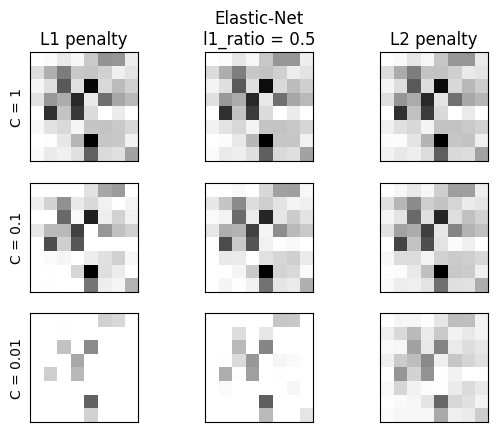

In [20]:
# classify small against large digits
y = (y > 4).astype(int)

l1_ratio = 0.5  # L1 weight in the Elastic-Net regularization

fig, axes = plt.subplots(3, 3)

# Set regularization parameter
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
    # Increase tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, l1_ratio=1, tol=0.01, solver="saga")
    clf_l2_LR = LogisticRegression(C=C, l1_ratio=0, tol=0.01, solver="saga")
    clf_en_LR = LogisticRegression(C=C, l1_ratio=l1_ratio, tol=0.01, solver="saga")
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print(f"C={C:.2f}")
    print(f"{'Sparsity with L1 penalty:':<40} {sparsity_l1_LR:.2f}%")
    print(f"{'Sparsity with Elastic-Net penalty:':<40} {sparsity_en_LR:.2f}%")
    print(f"{'Sparsity with L2 penalty:':<40} {sparsity_l2_LR:.2f}%")
    print(f"{'Score with L1 penalty:':<40} {clf_l1_LR.score(X, y):.2f}")
    print(f"{'Score with Elastic-Net penalty:':<40} {clf_en_LR.score(X, y):.2f}")
    print(f"{'Score with L2 penalty:':<40} {clf_l2_LR.score(X, y):.2f}")

    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title("Elastic-Net\nl1_ratio = %s" % l1_ratio)
        axes_row[2].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(
            np.abs(coefs.reshape(8, 8)),
            interpolation="nearest",
            cmap="binary",
            vmax=1,
            vmin=0,
        )
        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel(f"C = {C}")

plt.show()

## Preguntas

**¿Cómo afecta la dispersión a la precisión del modelo?**

Entre más pequeño sea el valor de C, esto significa que la dispersión será menos notoria, dado que a menor sea el número, más estricto será el modelo.

**¿Qué ventajas tiene un modelo disperso en términos de interpretabilidad?**

Una de las ventajas del uso de la dispersión en los modelos de regresión lineal, es que se pueden identificar las asimetrías entre datos. De igual forma, este tipo de medida es de utilidad para identificar e interpretar: patrones, valores atípicos y correlación; sin embargo, sus limitaciones se encuentran en la cantidad de variables que se empleen en el modelo

**¿Cómo se compara la regularización L1 con la regularización L2?**

Una de las diferencias principales entre las regularizaciones L1 y L2, es que la regularización L2 disminuye la magnitud de los coeficientes que a comparación de la L1 en donde los reduce a 0. 

**¿Qué impacto tiene la dispersión en la capacidad del modelo para generalizar?**

Concentra los valores más significativos de entre todo el conjunto de características

**¿Cómo podrías ajustar la fuerza de regularización para mejorar el rendimiento del modelo?**

Ir reduciendo el conjunto de datos, en donde cada simplificación se obtengan los mejores atributos de cada conjunto de características en los datos, para que de está forma se obtengan las distinciones más significativas de todo el conjunto general de datos.